In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
N=41
npzfile = np.load('./micro_datas_umax_eq_N/random_samples/macro/N{}/data_solutions_grid4.npz'.format(N))
Nx = npzfile['Nx']
Nt = npzfile['Nt']
dt = round(np.float64(npzfile['dt']),4)
dx = round(np.float64(npzfile['dx']),4)
mu = npzfile['mu']
guess = npzfile['guess']
sol = npzfile['solution']
u_max=N

In [3]:
s_rho = npzfile['s_density']
s_u = npzfile['s_velocity']
s_V = npzfile['s_optimal_cost']
t_points = npzfile['t_points']
x_points = npzfile['x_points']
c_points = x_points[:-1] + np.diff(x_points)/2

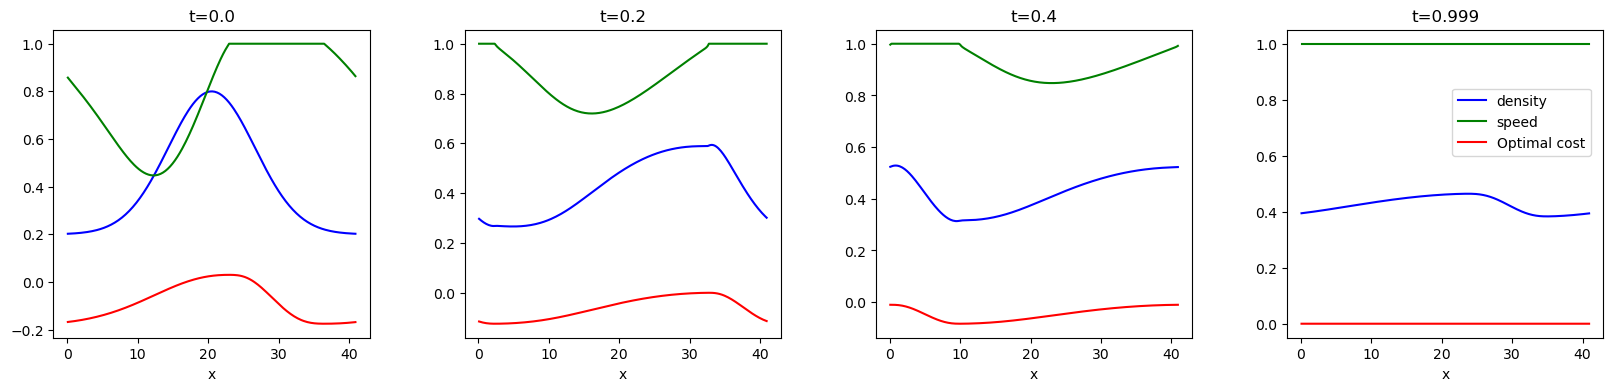

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(20, 4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
plt.subplot(1,4,1)
plt.plot(c_points,s_rho[:,0],'b',label='density')
plt.plot(c_points,s_u[:,0]/u_max,'g',label='speed')
plt.plot(c_points,s_V[:,0],'r',label='Optimal cost')
#     plt.grid()
plt.title("t=0.0")
plt.xlabel('x')

plt.subplot(1,4,2)
plt.plot(c_points,s_rho[:,int(Nt/5)],'b',label='density')
plt.plot(c_points,s_u[:,int(Nt/5)]/u_max,'g',label='speed')
plt.plot(c_points,s_V[:,int(Nt/5)],'r',label='Optimal cost')
#     plt.grid()
plt.title("t={t}".format(t=round(t_points[int(Nt/5)],3)))
plt.xlabel('x')

plt.subplot(1,4,3)
plt.plot(c_points,s_rho[:,int(2*Nt/5)],'b',label='density')
plt.plot(c_points,s_u[:,int(2*Nt/5)]/u_max,'g',label='speed')
plt.plot(c_points,s_V[:,int(2*Nt/5)],'r',label='Optimal cost')
#     plt.grid()
#     plt.legend(loc='center left')
plt.title("t={t}".format(t=round(t_points[int(2*Nt/5)],3)))
plt.xlabel('x')

plt.subplot(1,4,4)
plt.plot(c_points,s_rho[:,Nt-1],'b',label='density')
plt.plot(c_points,s_u[:,Nt-1]/u_max,'g',label='speed')
plt.plot(c_points,s_V[:,Nt-1],'r',label='Optimal cost')
#     plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.7))
plt.title("t={t}".format(t=round(t_points[Nt-1],3)))
plt.xlabel('x')
plt.show()
plt.clf()

In [5]:
N_list = [21,41,61,81,101,201]
def control_cost(N):
    npzfile = np.load('./micro_datas_umax_eq_N/random_samples/Sep1_N{}.npz'.format(N))
    Nt = npzfile['Nt']
    v_mfe=npzfile['v_mfe']
    v_bar=npzfile['v_bar']
    J_mfe=npzfile['J_mfe']
    J_bar=npzfile['J_bar']
    x_mfe=npzfile['X_mfe']
    x_bar=npzfile['x_bar']
    npzfile2 = np.load('./micro_datas_umax_eq_N/random_samples/macro/N{}/data_solutions_grid4.npz'.format(N))
    s_u = npzfile2['s_velocity']
    x_points = npzfile2['x_points']
    c_points = x_points[:-1] + np.diff(x_points)/2
    return Nt, v_mfe, v_bar, J_mfe, J_bar, x_mfe, x_bar, c_points, s_u

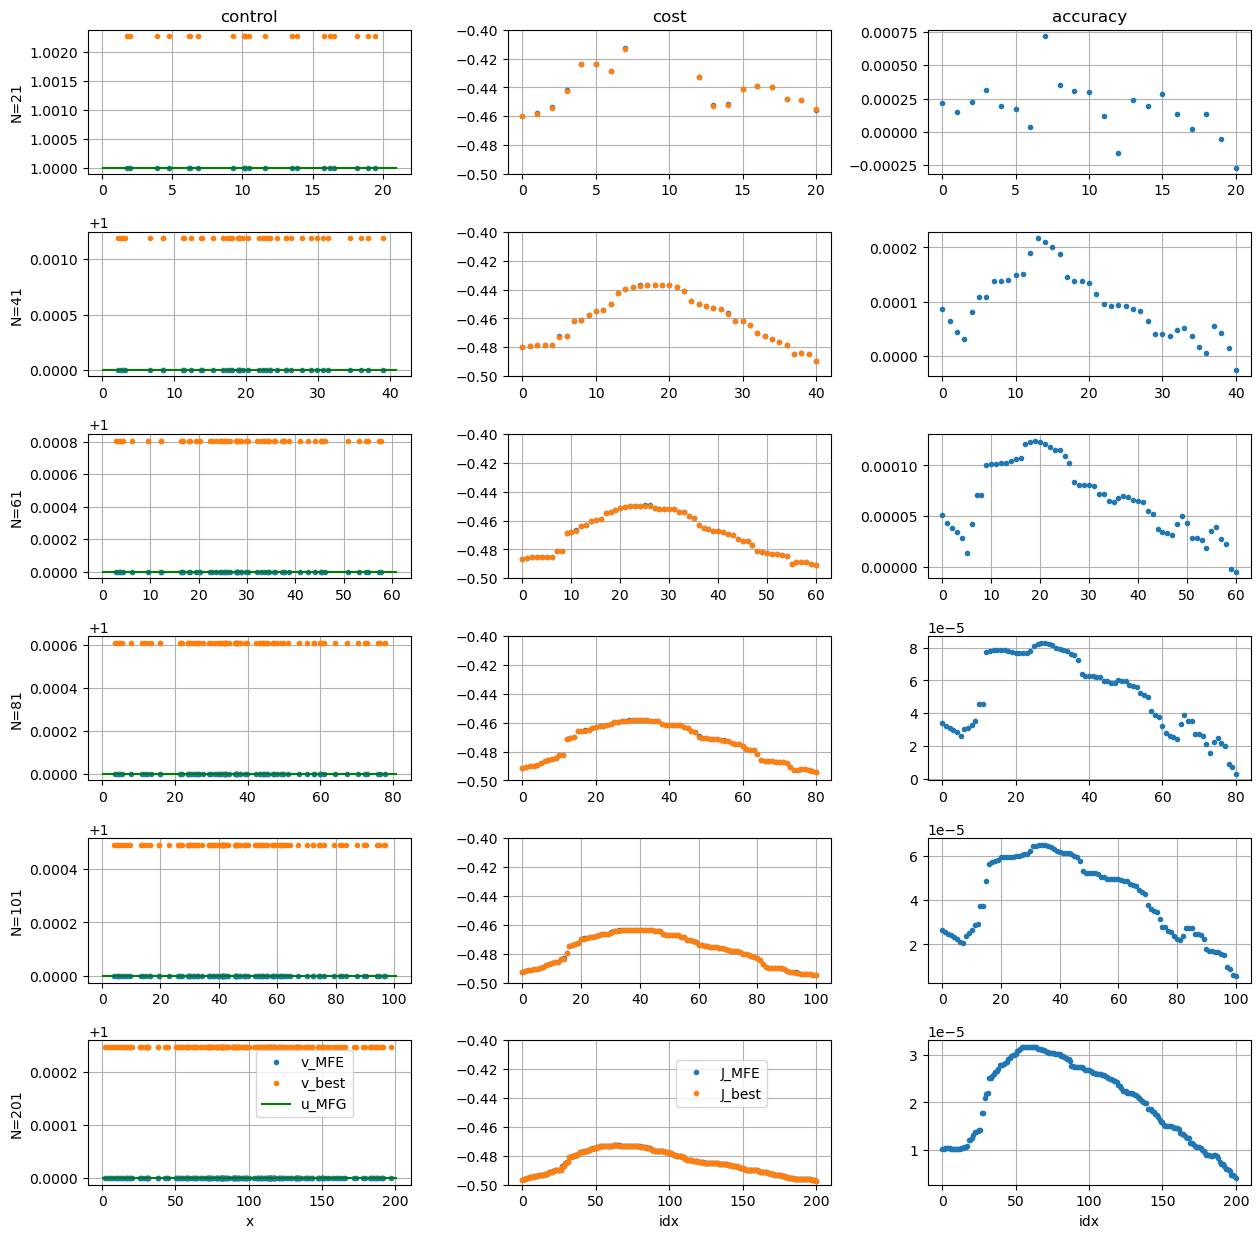

<Figure size 640x480 with 0 Axes>

In [11]:
MaxRA = []
MeanRA = []
plt.figure(figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
for n in range(len(N_list)):
    Nt, v_mfe, v_bar, J_mfe, J_bar, x_mfe, x_bar, c_points, s_u = control_cost(N_list[n])
    ti = Nt-1
    #accuracy = J_mfe-J_bar
    accuracy = np.asarray([sum(x) for x in zip(J_mfe,-J_bar)])
    MaxRA.append(accuracy.max()/abs(J_mfe).max())
    MeanRA.append(sum(accuracy)/sum(abs(J_mfe)))

    plt.subplot(len(N_list),3,3*n+1)
    plt.plot(x_mfe[:,ti],v_mfe[:,ti]/N_list[n],'.',label='v_MFE')
    plt.plot(x_mfe[:,ti],v_bar[:,ti]/N_list[n],'.',label='v_best')
    plt.plot(c_points,s_u[:,ti]/N_list[n],'g',label='u_MFG')
    #plt.plot(np.arange(0,len(x_mfe[:,ti])),v_mfe[:,ti],'.',label='v_MFE')
    #plt.plot(np.arange(0,len(x_bar[:,ti])),v_bar[:,ti],'.',label='v_best')
    plt.grid(True, which ="both")
    #     plt.grid()
    if n==0: plt.title('control')
    if n==len(N_list)-1 : 
        plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.7))
        plt.xlabel('x')
    plt.ylabel('N={NN}'.format(NN=N_list[n]))
    
    plt.subplot(len(N_list),3,3*n+2)
    #plt.plot(x_mfe[:,ti],J_mfe,'.',label='J_MFE')
    #plt.plot(x_bar[:,ti],J_bar,'.',label='J_best')
    plt.plot(np.arange(0,len(x_mfe[:,ti])),J_mfe,'.',label='J_MFE')
    plt.plot(np.arange(0,len(x_bar[:,ti])),J_bar,'.',label='J_best')
    plt.ylim(ymin=-0.5, ymax=-0.4)
    plt.grid(True, which ="both")
    #     plt.grid()
    if n==0: plt.title('cost')
    if n==len(N_list)-1 : 
        plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.7))
        plt.xlabel('idx')
        
    plt.subplot(len(N_list),3,3*n+3)
    plt.plot(np.arange(0,len(x_mfe[:,ti])),accuracy,'.',label='Accuracy')
    #plt.ylim(ymin=1e-8, ymax=1e-2)
    # Display grid
    plt.grid(True, which ="both")
    #plt.semilogy()
    #     plt.grid()
    if n==0: plt.title('accuracy')
    if n==len(N_list)-1 : 
        plt.xlabel('idx')
    
plt.show()
#fig.savefig("./plots/fig_control&cost_v-MFE_v-best.pdf")
plt.clf()

In [7]:
print('MaxRA=',MaxRA)
print('MeanRA=',MeanRA)

MaxRA= [0.0015605467377153457, 0.00044292290573502225, 0.0002538747757027658, 0.00016810446914930643, 0.00013105120669237294, 6.362521691693251e-05]
MeanRA= [0.0004018833310678296, 0.0002068619869597429, 0.00014246302435247103, 0.00010893863118074255, 8.654874525895578e-05, 4.164271235679199e-05]


In [8]:
import math
log_N = [math.log(x) for x in N_list]
log_MaxRA = [math.log(x) for x in MaxRA]
log_MeanRA = [math.log(x) for x in MeanRA]
from scipy.stats import linregress
max_res=linregress(log_N, log_MaxRA)
mean_res=linregress(log_N, log_MeanRA)
print(max_res.slope,mean_res.slope)

-1.4135866765880831 -0.9968560083708486


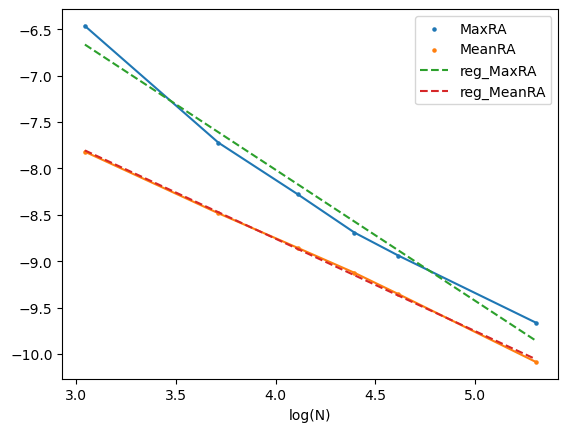

<Figure size 640x480 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
ax.scatter(log_N, log_MaxRA, s=5, label="MaxRA")
plt.plot(log_N, log_MaxRA)
ax.scatter(log_N, log_MeanRA, s=5, label="MeanRA")
plt.plot(log_N, log_MeanRA)
plt.plot(log_N, [max_res.intercept + max_res.slope*x for x in log_N], "--", label="reg_MaxRA")
plt.plot(log_N, [mean_res.intercept + mean_res.slope*x for x in log_N], "--", label="reg_MeanRA")
#plt.semilogy()
ax.set_xlabel("log(N)")
# plt.title("initial distrib")
plt.legend()
plt.show()
#fig.savefig("./plots/fig_accuracy.pdf")
plt.clf()

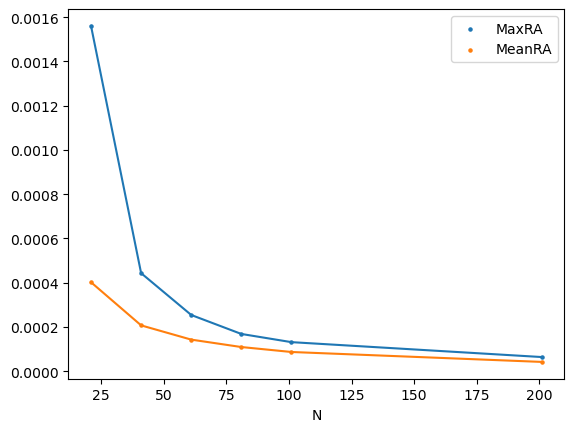

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots()
ax.scatter(N_list, MaxRA, s=5, label="MaxRA")
plt.plot(N_list, MaxRA)
ax.scatter(N_list, MeanRA, s=5, label="MeanRA")
plt.plot(N_list, MeanRA)
#plt.semilogy()
ax.set_xlabel("N")
# plt.title("initial distrib")
plt.legend()
plt.show()
#fig.savefig("./plots/fig_accuracy.pdf")
plt.clf()